
# Data Science do Zero
códigos: [Data Science from Scratch](https://github.com/joelgrus/data-science-from-scratch)
Um cientista de dados é alguém que extrai conhecimento de dados desorganizados.
* Encontrar os conectores-chave
* Competência significativa
## Probabilidade
## Estatística
## Álgebra linear

Lista de cientistas de dados

In [1]:
users = [
    {"id": 0, "name": "Hero"},
    {"id": 1, "name": "Dunn"},
    {"id": 2, "name": "Sue"},
    {"id": 3, "name": "Chi"},
    {"id": 4, "name": "Thor"},
    {"id": 5, "name": "Clive"},
    {"id": 6, "name": "Hicks"},
    {"id": 7, "name": "Devin"},
    {"id": 8, "name": "Kate"},
    {"id": 9, "name": "Klein"},
]

Lista de amizades entre os cientistas de dados

In [2]:
friendships = [
    (0, 1),
    (0, 2),
    (1, 2),
    (1, 3),
    (2, 3),
    (3, 4),
    (4, 5),
    (5, 6),
    (5, 7),
    (6, 8),
    (7, 8),
    (8, 9),
]

Figura que mostra a amizade entre os cientistas como um grafo

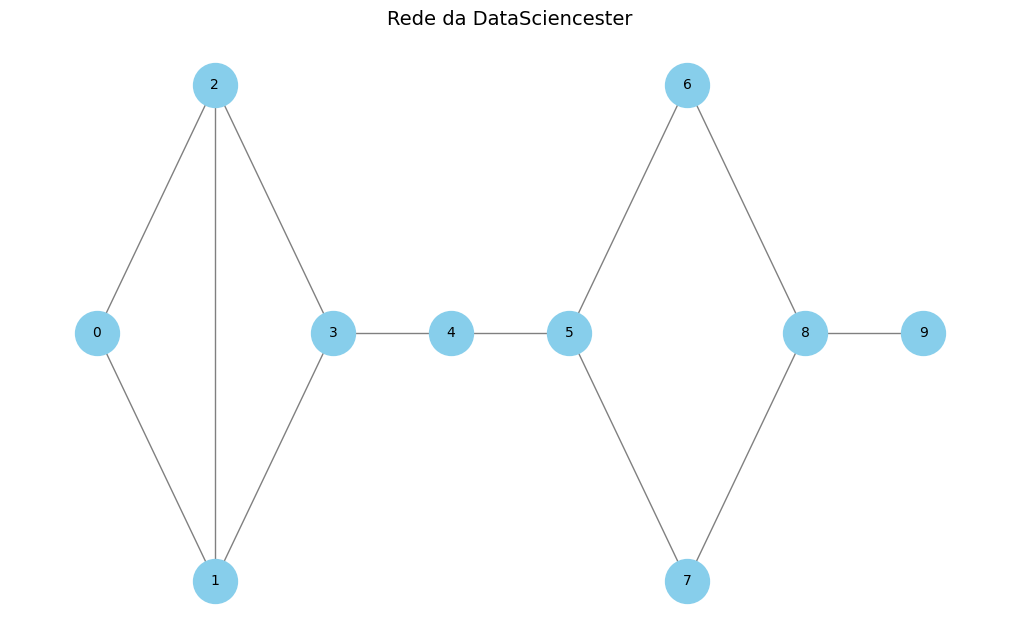

In [6]:
import matplotlib.pyplot as plt
import networkx as nx

## Criando o grafo
G = nx.Graph()
G.add_edges_from(friendships)

# Coordenadas manuais para os nós
pos = {
    0: (0, 2),
    1: (1, 1),
    2: (1, 3),
    3: (2, 2),
    4: (3, 2),
    5: (4, 2),
    6: (5, 3),
    7: (5, 1),
    8: (6, 2),
    9: (7, 2),
}

# Plotando o grafo
plt.figure(figsize=(10, 6))
nx.draw(
    G,
    pos,
    with_labels=True,
    node_color="skyblue",
    node_size=1000,
    font_size=10,
    edge_color="gray",
)
plt.title("Rede da DataSciencester", fontsize=14)
plt.show()

Obtendo novas informações baseado na amizade

In [7]:
for user in users:
  user["friends"] = []

Adicionando uma lista de amigos de cada usuário

In [8]:
for i, j in friendships:
  # isso funciona porque users[i] é o usuário cuja id é i
  users[i]["friends"].append(users[j]) # adiciona i como um amigo de j
  users[j]["friends"].append(users[i]) # adiciona j como um amigo de i

In [9]:
def number_of_friends(user):
  """quantos amigos o usuário tem?"""
  return len(user["friends"]) # tamanho da lista friend_ids
  
total_connections = sum(number_of_friends(user) for user in users) # 24

In [10]:
num_users = len(users) # tamanho da lista de usuários
avg_connections = total_connections / num_users # 2.4

In [ ]:
# cria uma lista (user_id, number_of_friends)
num_friends_by_id = [(user["id"], number_of_friends(user)) for user in users]

# Ordena pela quantidade de amigos, do maior para o menor
sorted_num_friends = sorted(
    num_friends_by_id,
    key=lambda user_tuple: user_tuple[1],  # Acessa o segundo elemento da tupla
    reverse=True,
)
# cada par é (user_id, num_friends)
# [(1, 3), (2, 3), (3, 3), (5, 3), (8, 3),
# (0, 2), (4, 2), (6, 2), (7, 2), (9, 1)]

/tmp/ipykernel_16867/571601035.py:23: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.Blues), label="Grau (número de conexões)")


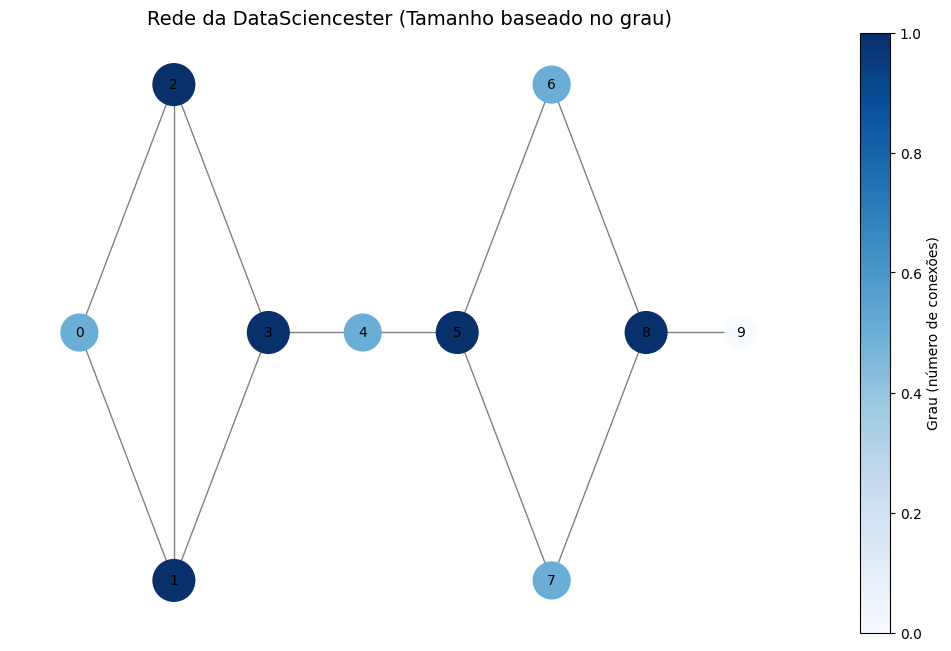

In [11]:
# Calcula o grau (número de conexões) de cada nó
node_degrees = dict(G.degree())

# Define o tamanho dos nós proporcional ao grau (escalar para melhor visualização)
node_sizes = [300 + degree * 200 for degree in node_degrees.values()]

# Define a cor dos nós baseada no grau (opcional, para destaque visual)
node_colors = list(node_degrees.values())

# Plotando o grafo
plt.figure(figsize=(10, 6))
nx.draw(
    G,
    pos,
    with_labels=True,
    node_color=node_colors,
    node_size=node_sizes,
    cmap=plt.cm.Blues,  # Mapa de cores
    font_size=10,
    edge_color="gray",
)
plt.title("Rede da DataSciencester (Tamanho baseado no grau)", fontsize=14)
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.Blues), label="Grau (número de conexões)")
plt.show()